In [1]:
%matplotlib inline

In [2]:
from scipy import signal
from kid_readout.measurement.io import nc
from kid_readout.analysis.timeseries import filters

In [26]:
save_directory = '/home/flanigan/temp/'

In [3]:
ncf = nc.NCFile('/data/detectors/2016-05-19_132214_sweep_stream.nc')

In [4]:
ss = [ncf.read(name) for name in ncf.node_names()]

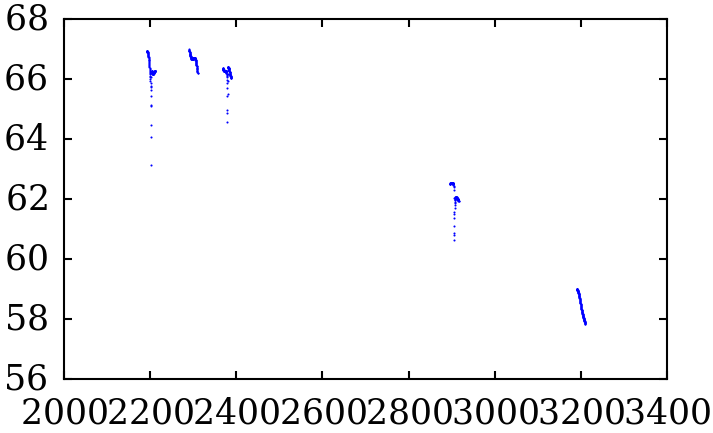

In [5]:
fig, ax = plt.subplots()
for s in ss:
    ax.plot(s.sweep.frequency_MHz, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=1)

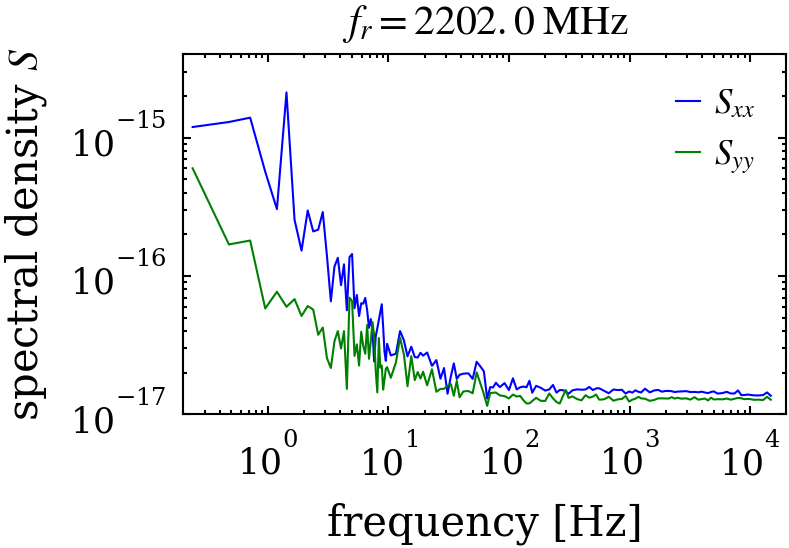

In [27]:
s = ss[0]

fig, ax = plt.subplots()
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density $S$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('$f_r = {:.1f} \; \mathrm{{MHz}}$'.format(1e-6 * s.resonator.f_0))
ax.set_xlim(2e-1, 2e4)
ax.set_ylim(1e-17, 4e-15)

ax.plot(s.S_frequency, s.S_xx, label=r'$S_{xx}$')
ax.plot(s.S_frequency, s.S_yy, label=r'$S_{yy}$')

ax.legend(loc='best')

fig.savefig(save_directory + 'fr2202_Sxx_and_Syy.pdf')

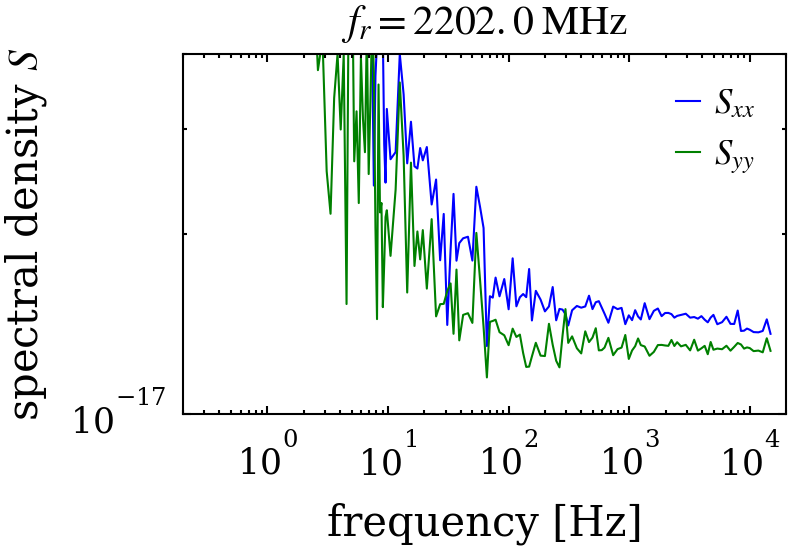

In [28]:
s = ss[0]

fig, ax = plt.subplots()
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density $S$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('$f_r = {:.1f} \; \mathrm{{MHz}}$'.format(1e-6 * s.resonator.f_0))
ax.set_xlim(2e-1, 2e4)
ax.set_ylim(1e-17, 4e-17)

ax.plot(s.S_frequency, s.S_xx, label=r'$S_{xx}$')
ax.plot(s.S_frequency, s.S_yy, label=r'$S_{yy}$')

ax.legend(loc='best')

fig.savefig(save_directory + 'fr2202_Sxx_and_Syy_detail.pdf')

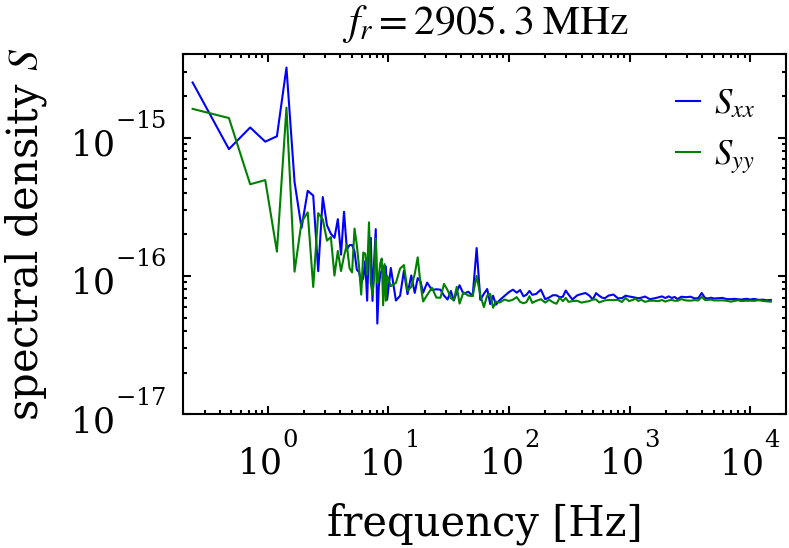

In [29]:
s = ss[3]

fig, ax = plt.subplots()
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density $S$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('$f_r = {:.1f} \; \mathrm{{MHz}}$'.format(1e-6 * s.resonator.f_0))
ax.set_xlim(2e-1, 2e4)
ax.set_ylim(1e-17, 4e-15)

ax.plot(s.S_frequency, s.S_xx, label=r'$S_{xx}$')
ax.plot(s.S_frequency, s.S_yy, label=r'$S_{yy}$')

ax.legend(loc='best')

fig.savefig(save_directory + 'fr2905_Sxx_and_Syy.pdf')

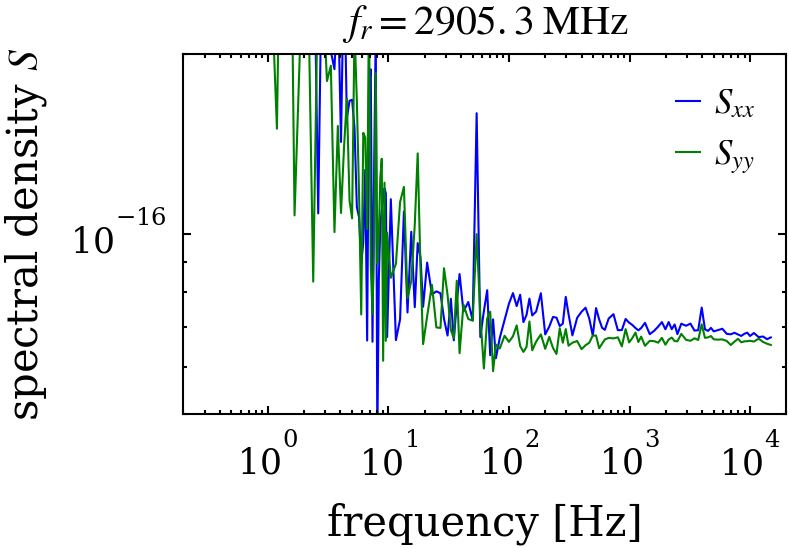

In [30]:
s = ss[3]

fig, ax = plt.subplots()
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density $S$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('$f_r = {:.1f} \; \mathrm{{MHz}}$'.format(1e-6 * s.resonator.f_0))
ax.set_xlim(2e-1, 2e4)
ax.set_ylim(5e-17, 2e-16)

ax.plot(s.S_frequency, s.S_xx, label=r'$S_{xx}$')
ax.plot(s.S_frequency, s.S_yy, label=r'$S_{yy}$')

ax.legend(loc='best')

fig.savefig(save_directory + 'fr2905_Sxx_and_Syy_detail.pdf')

In [8]:
s_on = ss[0]
nfft = int(2**(np.floor(np.log2(s_on.stream.s21_raw.size)) - 3))
s21r_on, fs21_on = plt.mlab.psd(s_on.stream.s21_raw.real, Fs=s_on.stream.stream_sample_rate, NFFT=nfft)
s21i_on, fs21_on = plt.mlab.psd(s_on.stream.s21_raw.imag, Fs=s_on.stream.stream_sample_rate, NFFT=nfft)
s21r_on = s21r_on[1:-1]
s21i_on = s21i_on[1:-1]
fs21_on = fs21_on[1:-1]

In [18]:
s_off = ss[1]
nfft = int(2**(np.floor(np.log2(s_off.stream.s21_raw.size)) - 3))
s21r_off, fs21_off = plt.mlab.psd(s_off.stream.s21_raw.real, Fs=s_off.stream.stream_sample_rate, NFFT=nfft)
s21i_off, fs21_off = plt.mlab.psd(s_off.stream.s21_raw.imag, Fs=s_off.stream.stream_sample_rate, NFFT=nfft)
s21r_off = s21r_off[1:-1]
s21i_off = s21i_off[1:-1]
fs21_off = fs21_off[1:-1]

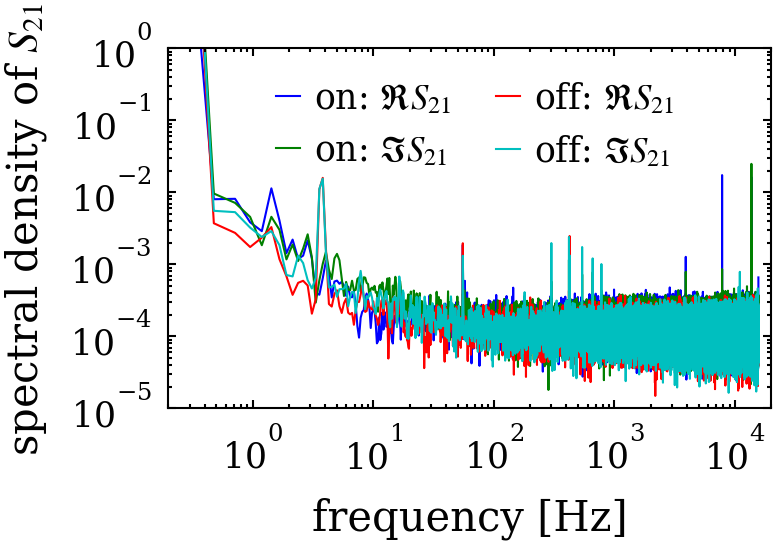

In [31]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density of $S_{21}$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(2e-1, 2e4)
ax.set_ylim(1e-5, 1e0)

ax.plot(fs21_on, s21r_on, label=r'on: $\Re S_{21}$')
ax.plot(fs21_on, s21i_on, label=r'on: $\Im S_{21}$')
ax.plot(fs21_off, s21r_off, label=r'off: $\Re S_{21}$')
ax.plot(fs21_off, s21i_off, label=r'off: $\Im S_{21}$')

ax.legend(loc='best', ncol=2)

fig.savefig(save_directory + 'on_and_off_psd_of_S21.pdf')